<a href="https://colab.research.google.com/github/Sornambal/Cognifyz-Technology-Internship-Level-2/blob/main/Cognifyz_DS_Level_2(task_1)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Percentage with Table Booking: 12.12%
✅ Percentage with Online Delivery: 25.66%

⭐ Average rating (with booking): 3.44
⭐ Average rating (without booking): 2.56


/tmp/ipython-input-2-3345034560.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['With Booking', 'Without Booking'],


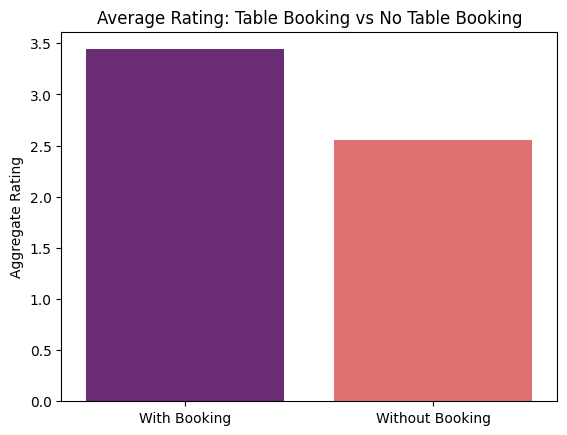


📊 Online Delivery Availability by Price Range:
   Price range  Delivery %
0            1   15.774077
1            2   41.310633
2            3   29.190341
3            4    9.044369


/tmp/ipython-input-2-3345034560.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delivery_by_price, x='Price range', y='Delivery %', palette='coolwarm')


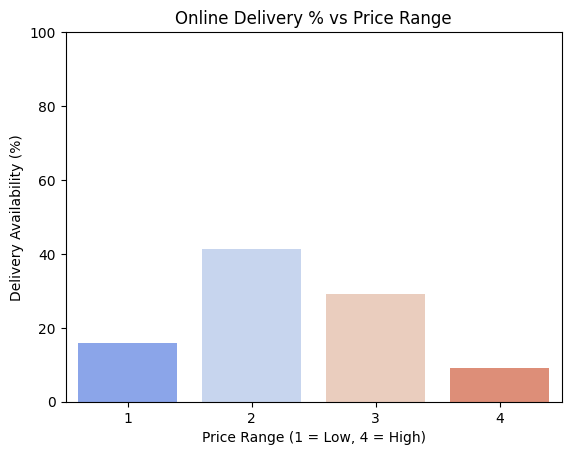

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/Dataset .csv')

# Clean data: standardize values
df['Has Table booking'] = df['Has Table booking'].str.strip().str.lower().map({'yes': True, 'no': False})
df['Has Online delivery'] = df['Has Online delivery'].str.strip().str.lower().map({'yes': True, 'no': False})

# Drop rows with missing essential values
df = df.dropna(subset=['Has Table booking', 'Has Online delivery', 'Aggregate rating', 'Price range'])

# 1️⃣ Percentage offering Table Booking & Online Delivery
table_booking_pct = df['Has Table booking'].mean() * 100
online_delivery_pct = df['Has Online delivery'].mean() * 100

print(f"✅ Percentage with Table Booking: {table_booking_pct:.2f}%")
print(f"✅ Percentage with Online Delivery: {online_delivery_pct:.2f}%")

# 2️⃣ Compare average ratings: With vs Without Table Booking
rating_with_booking = df[df['Has Table booking'] == True]['Aggregate rating'].mean()
rating_without_booking = df[df['Has Table booking'] == False]['Aggregate rating'].mean()

print(f"\n⭐ Average rating (with booking): {rating_with_booking:.2f}")
print(f"⭐ Average rating (without booking): {rating_without_booking:.2f}")

# Plot ratings comparison
sns.barplot(x=['With Booking', 'Without Booking'],
            y=[rating_with_booking, rating_without_booking],
            palette='magma')
plt.title("Average Rating: Table Booking vs No Table Booking")
plt.ylabel("Aggregate Rating")
plt.show()

# 3️⃣ Online Delivery by Price Range
delivery_by_price = df.groupby('Price range')['Has Online delivery'].mean().reset_index()
delivery_by_price['Delivery %'] = delivery_by_price['Has Online delivery'] * 100

print("\n📊 Online Delivery Availability by Price Range:")
print(delivery_by_price[['Price range', 'Delivery %']])

# Plot delivery % by price range
sns.barplot(data=delivery_by_price, x='Price range', y='Delivery %', palette='coolwarm')
plt.title("Online Delivery % vs Price Range")
plt.ylabel("Delivery Availability (%)")
plt.xlabel("Price Range (1 = Low, 4 = High)")
plt.ylim(0, 100)
plt.show()
